In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
%matplotlib inline

/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/lpo_albert/miniconda3/envs/hansys/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See htt

* Carrega os dados de ambas as torrres

In [2]:
# Carrega os dados de santarém
df_santarem = pd.read_csv('TORRE DE SANTAREM/Dataset/ameriflux-santarem-dados-processados.csv')

# Carrega os dados do Peru
df_pe = pd.read_csv('AMF_PE-QFR_FLUXNET_FULLSET_2018-2019_3-5/AMF_PE-QFR_FLUXNET_FULLSET_HH_2018-2019_3-5_processed.csv')

In [3]:
df_santarem.head(3)

Date  Year  DoY  Hour    LE_f    H_f  Rg_f  VPD_f   rH_f  Tair_f  \
0  2009-01-01  2009    1   0.0  -8.040 -7.967   0.0  0.014  100.0  22.341   
1  2009-01-01  2009    1   0.5  -8.040 -7.967   0.0  0.014  100.0  22.341   
2  2009-01-01  2009    1   1.0 -15.866 -5.177   0.0  0.014   99.5  22.360   

   Tsoil_f  PotRad_uStar  R_ref_uStar  PRP  NPP_uStar  
0   30.156           0.0       4.4583  NaN    -5.8804  
1   30.156           0.0       4.4583  NaN    -5.8804  
2   30.156           0.0       4.4583  NaN    -5.8804

In [4]:
df_pe.head(3)

TIMESTAMP_START  TA_F_MDS  SW_IN_POT  SW_IN_F_MDS  LW_IN_F  \
0  2018-01-01 00:00:00    24.196        0.0        0.000  411.887   
1  2018-01-01 00:30:00    24.195        0.0        0.000  411.887   
2  2018-01-01 01:00:00    23.180        0.0        0.082  415.333   

   LW_IN_JSB_F  VPD_ERA  PA_ERA    P_F   WS_F  ...  NETRAD  PPFD_IN  \
0      479.338    1.105  98.830  0.048  1.091  ...     NaN      NaN   
1      479.348    0.889  98.793  0.048  0.952  ...     NaN      NaN   
2      471.456    0.672  98.756  0.104  1.459  ... -21.695    0.014   

   CO2_F_MDS  TS_F_MDS_1  LE_F_MDS  H_F_MDS  NPP_DT_VUT_USTAR50  Year  Month  \
0    443.979      24.474   7.21952 -4.53360           -9.381420  2018      1   
1    443.979      24.410   7.21952 -4.47688           -9.381070  2018      1   
2    454.899      24.345   9.34216 -2.80919           -9.009657  2018      1   

   DoY  
0    1  
1    1  
2    1  

[3 rows x 23 columns]

* Converte as datas para o formato Datetime

In [5]:
# Converter as datas para o formato datetime
df_santarem['Date'] = pd.to_datetime(df_santarem['Date'])
df_pe['TIMESTAMP_START'] = pd.to_datetime(df_pe['TIMESTAMP_START'])

In [6]:
# Mostra o tipo de dado de cada coluna
print(df_santarem['Date'].dtype)
print(df_pe['TIMESTAMP_START'].dtype)

datetime64[ns]
datetime64[ns]


* Novos dataframes mudando o nome das colunas para que os nomes sejam iguais em ambos datasets
    * Date (df_santarem) e TIMESTAMP_START (df_pe): serão renomeadas para Date
    * Tair (df_santarem) e TA_F_MDS (df_pe): serão renomeadas para TA
    * PotRad_uStar e SW_IN_POT: serão renomeadas para PotRad
    * Rg_f e SW_IN_F_MDS: serão renomeadas para SW_IN
    * VPD_f e VPD_ERA: serão renomeadas para VPD
    * Ustar e USTAR: serão renomeadas para USTAR
    * rH_f e RH: serão renomeadas para RH
    * Tsoil_f e TS_F_MDS_1: serão renomeadas para TS
    * LE_f e LE_F_MDS: serão renomeadas para LE
    * H_f e H_F_MDS: serão renomeadas para H
    * Year e Year: serão renomeadas para Year
    * DoY e DoY: serão renomeadas para DoY
    * NPP_uStar e NPP_DT_VUT_USTAR50: serão renomeadas para NPP

In [19]:
# Agora, renomeie as colunas conforme as instruções anteriores
df_santarem = df_santarem.rename(columns={
    'Date': 'Date',
    'Tair_f': 'TA',
    'PotRad_uStar': 'PotRad',
    'Rg_f': 'SW_IN',
    'VPD_f': 'VPD_f',
    'Ustar': 'USTAR',
    'rH_f': 'RH',
    'Tsoil_f': 'TS',
    'LE_f': 'LE_f',
    'H_f': 'H_f',
    'Year': 'Year',
    'DoY': 'DoY',
    'NPP_uStar': 'NPP'
})

df_pe = df_pe.rename(columns={
    'TIMESTAMP_START': 'Date',
    'TA_F_MDS': 'TA',
    'SW_IN_POT': 'PotRad',
    'SW_IN_F_MDS': 'SW_IN',
    'VPD_ERA': 'VPD_f',
    'USTAR': 'USTAR',
    'RH': 'RH',
    'TS_F_MDS_1': 'TS',
    'LE_F_MDS': 'LE_f',
    'H_F_MDS': 'H_f',
    'Year': 'Year',
    'DoY': 'DoY',
    'NPP_DT_VUT_USTAR50': 'NPP'
})


* Algumas variáveis não estão presentes em ambos os datasets
    * LW_IN_F está presente somente nos dados do PE
    * PA_ERA está presente somente nos dados do PE
    * P_F está presente somente nos dados do PE
    * WS_F está presente somente nos dados do PE
    * WD está presente somente nos dados do PE
    * NETRAD está presente somente nos dados do PE
    * PPFD_IN está presente somente nos dados do PE
    * CO2_F_MDS está presente somente nos dados do PE

* Vamos filtrar os datasets para obtermos somente as variáveis que estão presentes em ambos

In [21]:
selected_features = ['Date', 'TA', 'PotRad', 'SW_IN', 'VPD_f', 'RH', 'TS', 'LE_f', 'H_f', 'Year', 'DoY', 'NPP']

# Filtra o dataset df_santarem para as colunas selecionadas
df_santarem_filtered = df_santarem[selected_features]

# Filtra o dataset df_pe para as colunas selecionadas
df_pe_filtered = df_pe[selected_features]

* Compara as variáveis ao longo do tempo

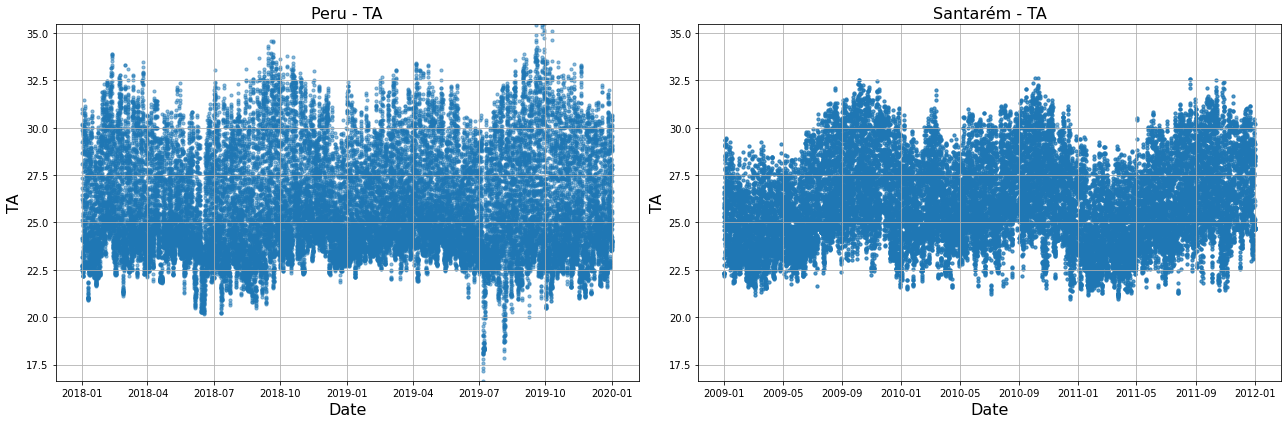

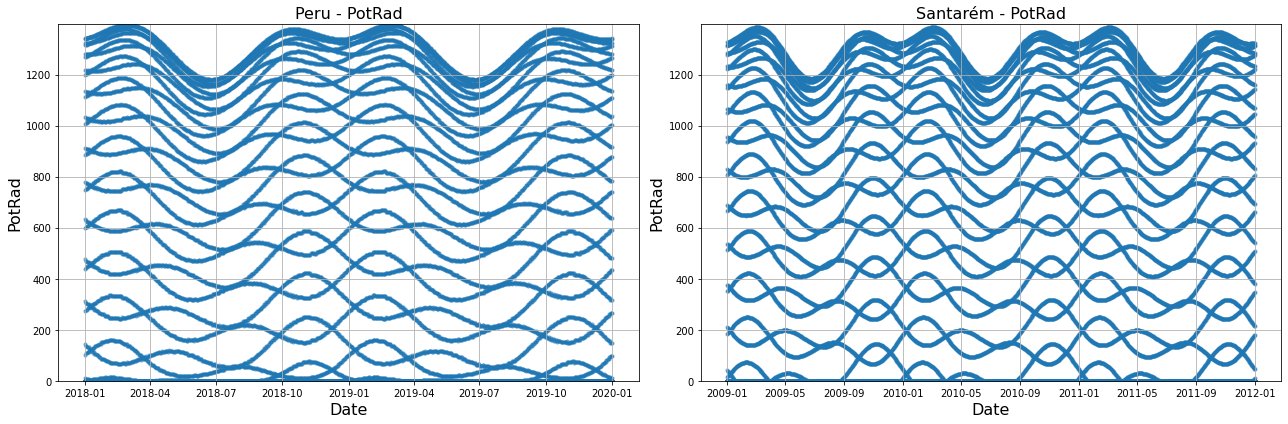

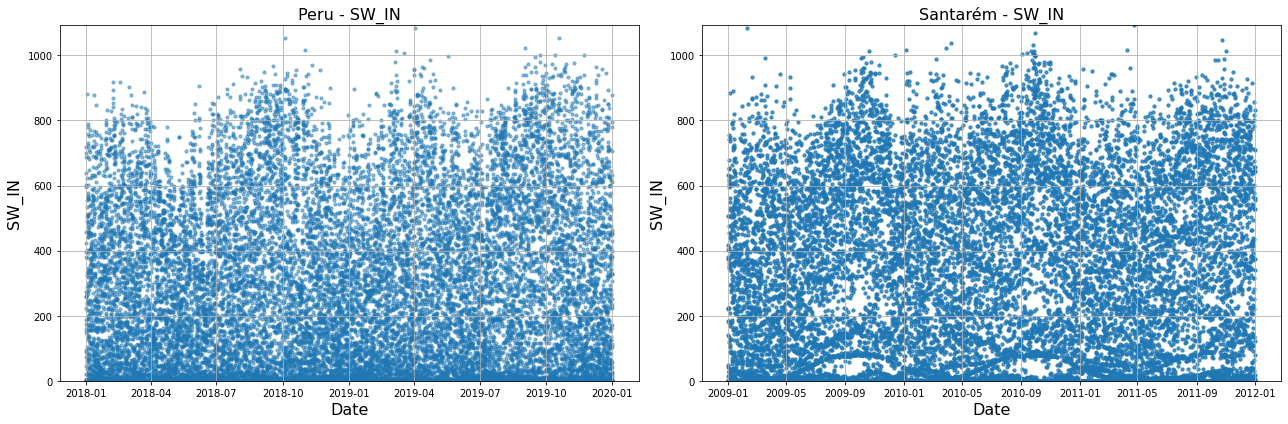

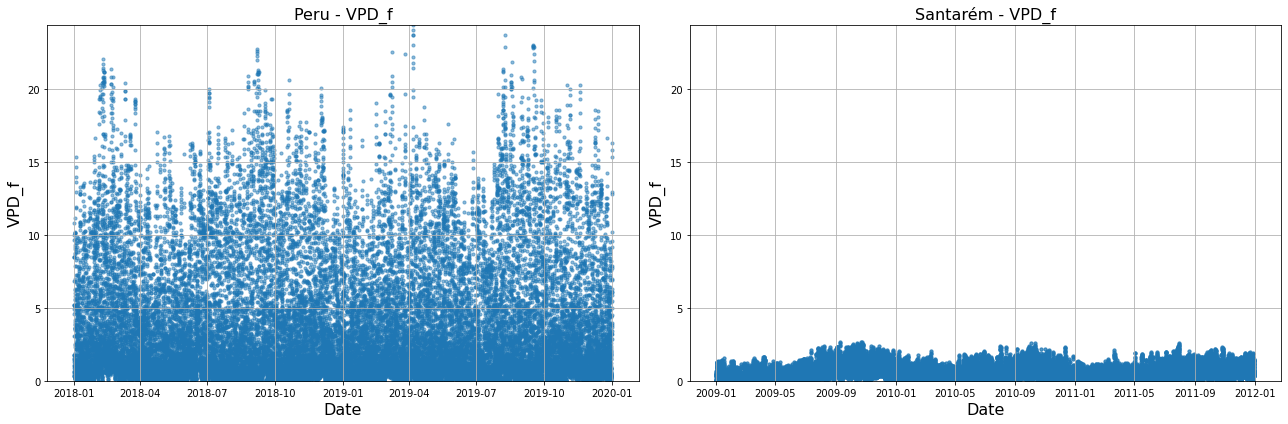

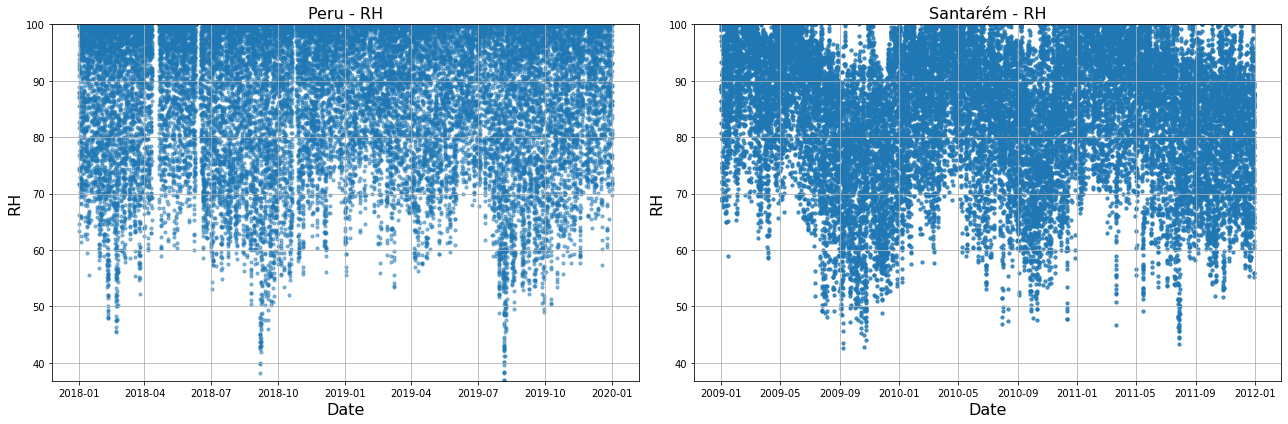

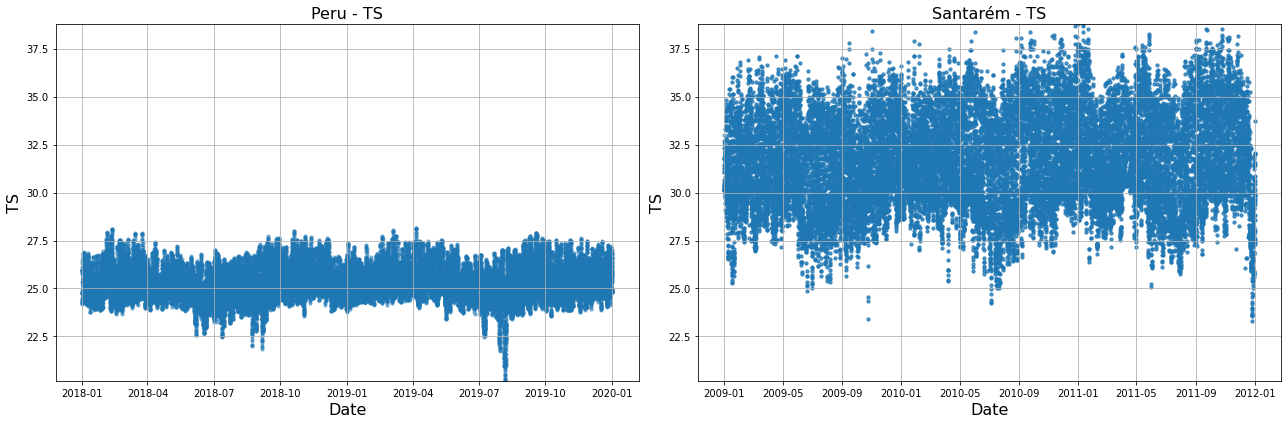

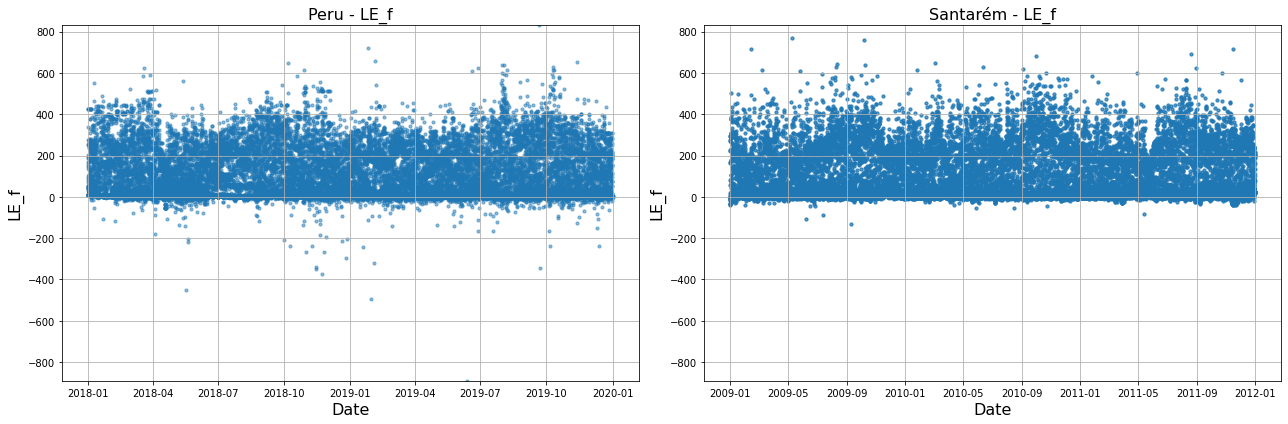

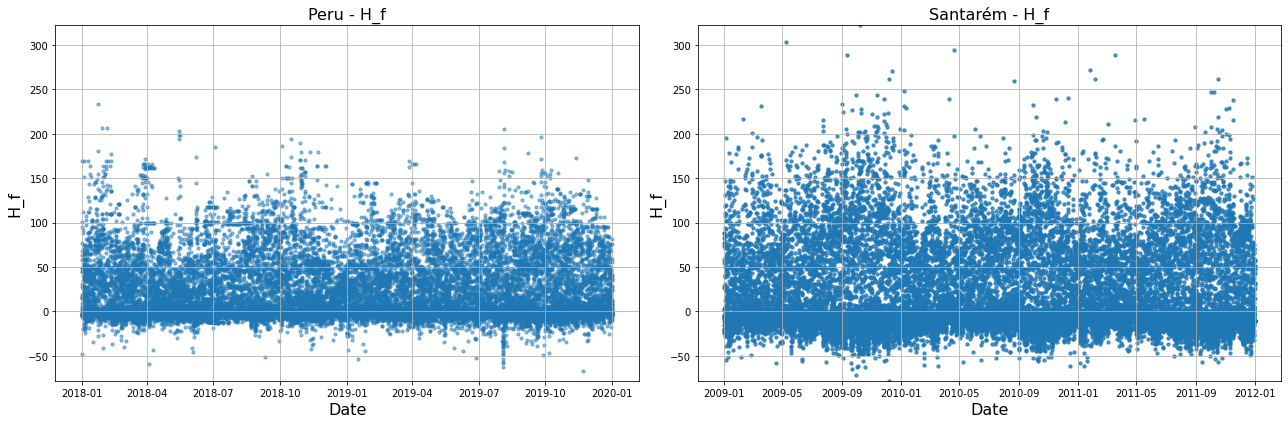

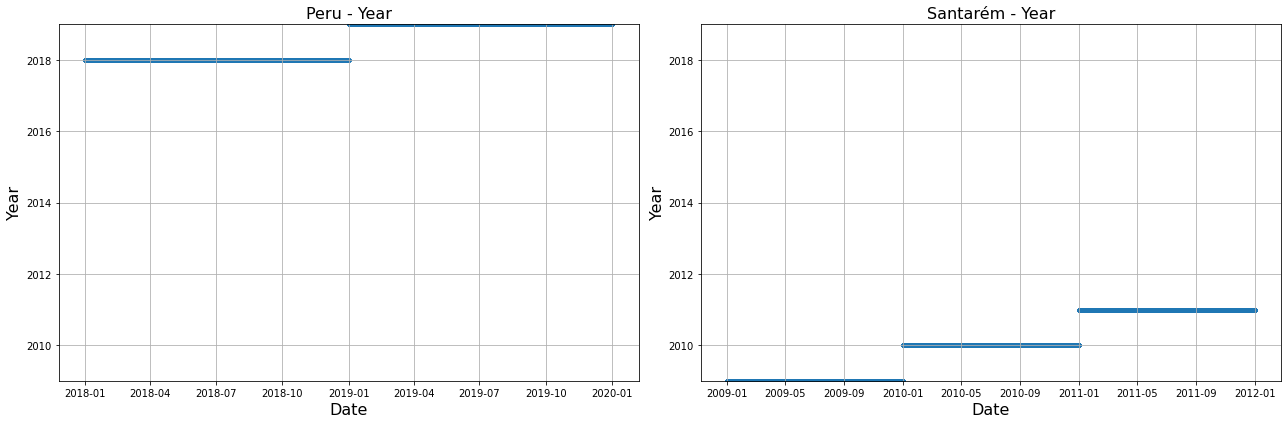

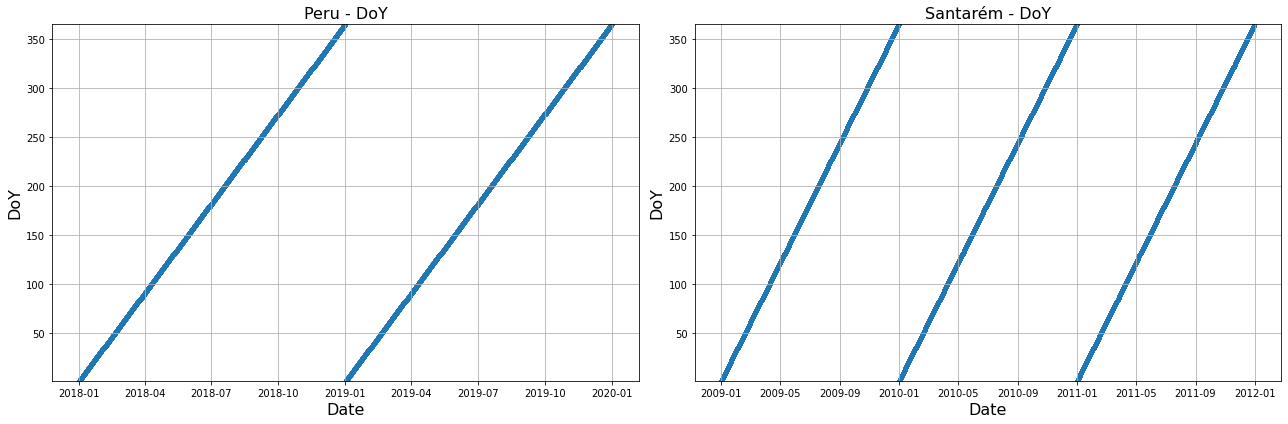

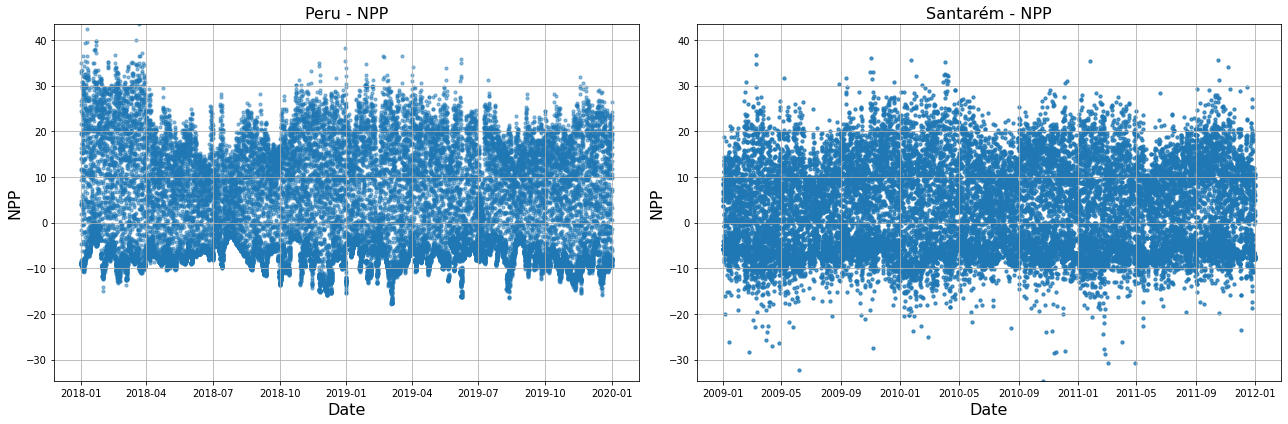

In [22]:
import matplotlib.pyplot as plt

# Lista de features a serem plotadas
colunas_a_plotar = df_pe_filtered.columns.drop('Date')

font_size = 16

# Cria um gráfico temporal para cada feature em relação a TIMESTAMP_START
for coluna in colunas_a_plotar:
    plt.figure(figsize=(18, 6))
    
    # Subplot para df_pe_filtered
    plt.subplot(1, 2, 1)
    plt.scatter(df_pe_filtered['Date'], df_pe_filtered[coluna], s=10, alpha=0.5)
    plt.xlabel('Date', fontsize=font_size)
    plt.ylabel(coluna, fontsize=font_size)
    plt.title(f'Peru - {coluna}', fontsize=font_size)
    plt.grid(True)
    plt.ylim(min(df_pe_filtered[coluna].min(), df_santarem_filtered[coluna].min()), 
             max(df_pe_filtered[coluna].max(), df_santarem_filtered[coluna].max()))  # Define a mesma escala no eixo y
    
    # Subplot para df_santarem_filtered
    plt.subplot(1, 2, 2)
    plt.scatter(df_santarem_filtered['Date'], df_santarem_filtered[coluna], s=10, alpha=0.5)
    plt.xlabel('Date', fontsize=font_size)
    plt.ylabel(coluna, fontsize=font_size)
    plt.title(f'Santarém - {coluna}', fontsize=font_size)
    plt.grid(True)
    plt.ylim(min(df_pe_filtered[coluna].min(), df_santarem_filtered[coluna].min()), 
             max(df_pe_filtered[coluna].max(), df_santarem_filtered[coluna].max()))  # Define a mesma escala no eixo y
    
    plt.tight_layout()
    plt.show()


* Compara as variáveis usando Violin Plot

/tmp/ipykernel_8131/4938055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe_filtered['Origem'] = 'Peru'
/tmp/ipykernel_8131/4938055.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_santarem_filtered['Origem'] = 'Santarém'


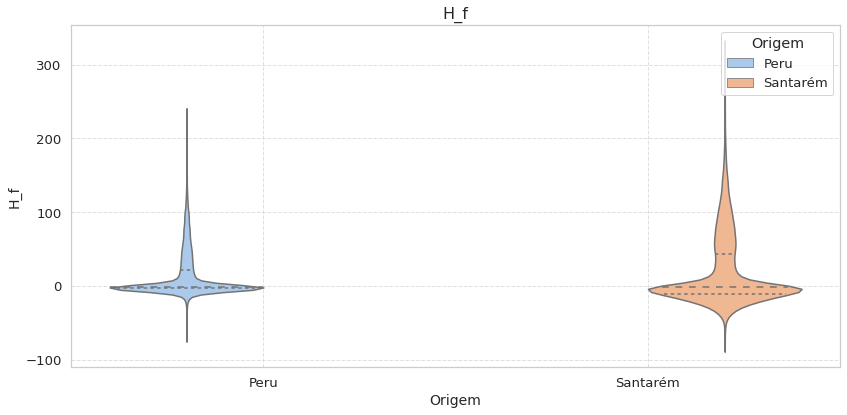

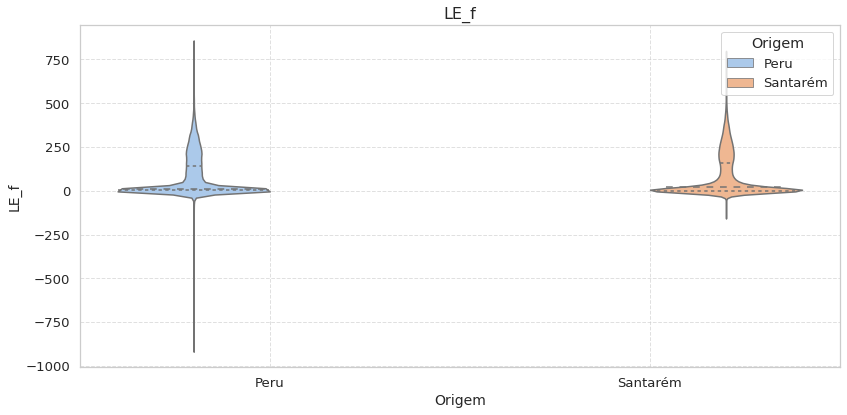

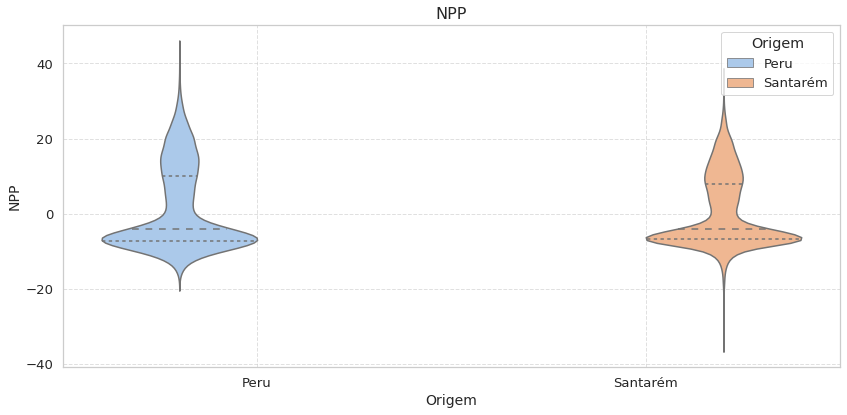

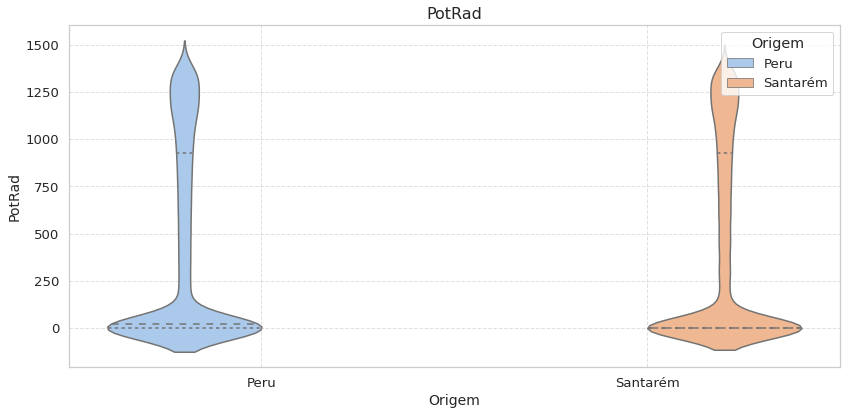

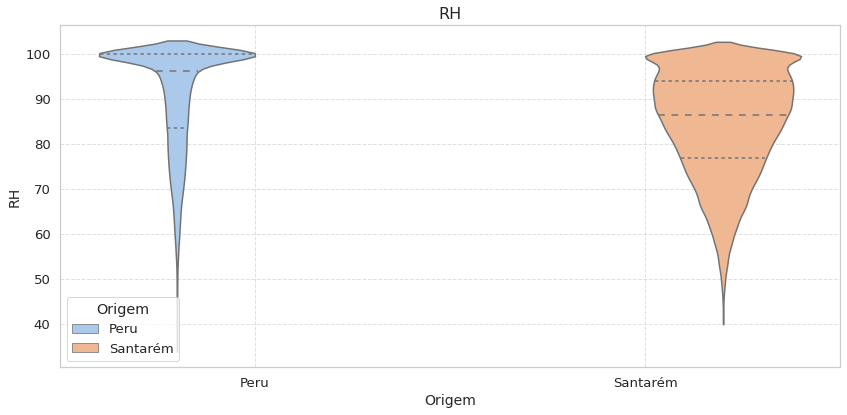

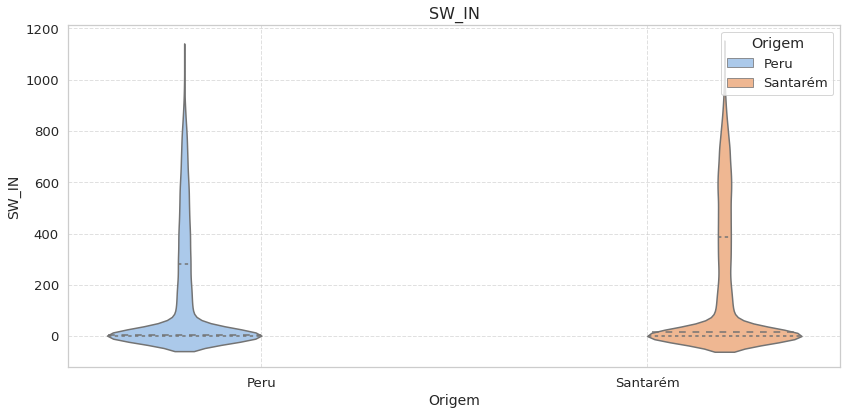

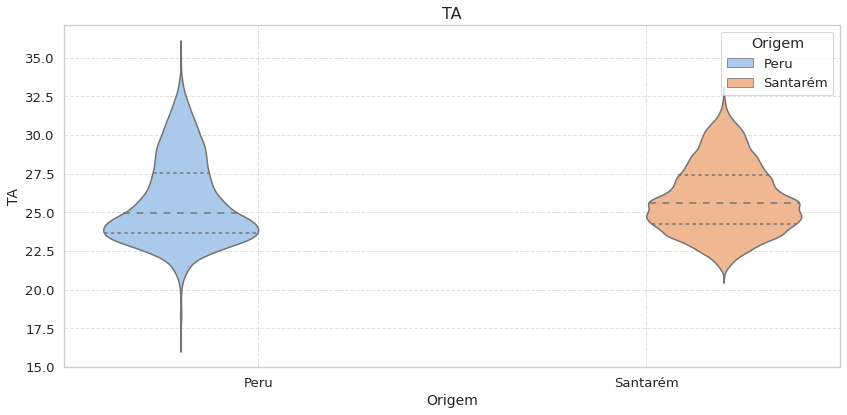

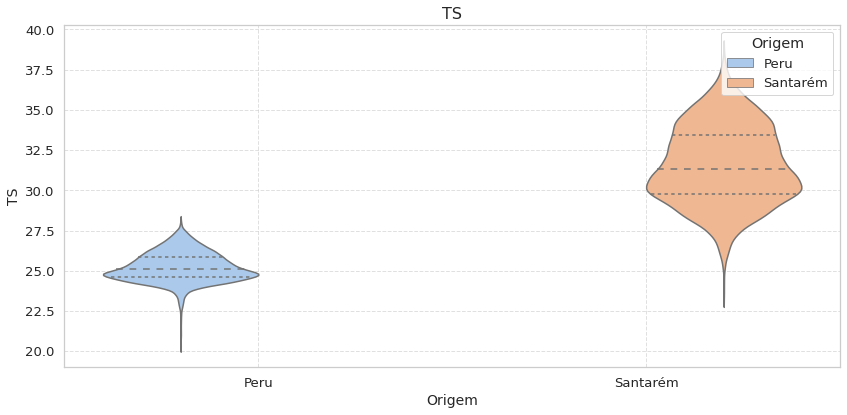

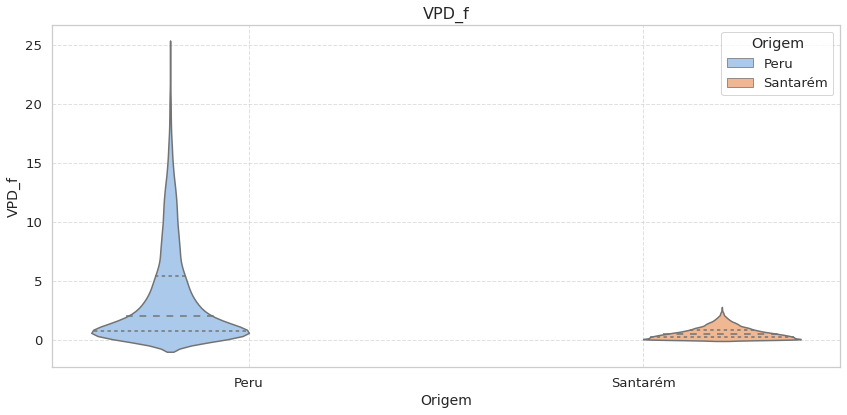

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Concatenando os dataframes com uma nova coluna indicando a origem dos dados
df_pe_filtered['Origem'] = 'Peru'
df_santarem_filtered['Origem'] = 'Santarém'
df_combined = pd.concat([df_pe_filtered, df_santarem_filtered], ignore_index=True)

sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(12, 6)})

# Lista de colunas (features) excluindo Date, DoY, Year e Month
colunas_a_plotar = df_combined.columns.difference(['Date', 'DoY', 'Year', 'Month', 'Origem'])

# Cria o violin plot vertical para cada feature
for coluna in colunas_a_plotar:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Origem', y=df_combined[coluna], hue='Origem', data=df_combined, palette='pastel', inner='quartile')
    plt.title(f'{coluna}', fontsize=16)
    plt.ylabel(coluna, fontsize=14)
    plt.xlabel('Origem', fontsize=14)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Adiciona a legenda com a melhor posição
    plt.legend(title='Origem', loc='best')
    
    plt.show()

* Compara as variáveis usando Boxplot

C:\Users\albert.DESKTOP-015ON1O\AppData\Local\Temp\ipykernel_16196\3539144801.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe_filtered['Origem'] = 'Peru'
C:\Users\albert.DESKTOP-015ON1O\AppData\Local\Temp\ipykernel_16196\3539144801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_santarem_filtered['Origem'] = 'Santarém'


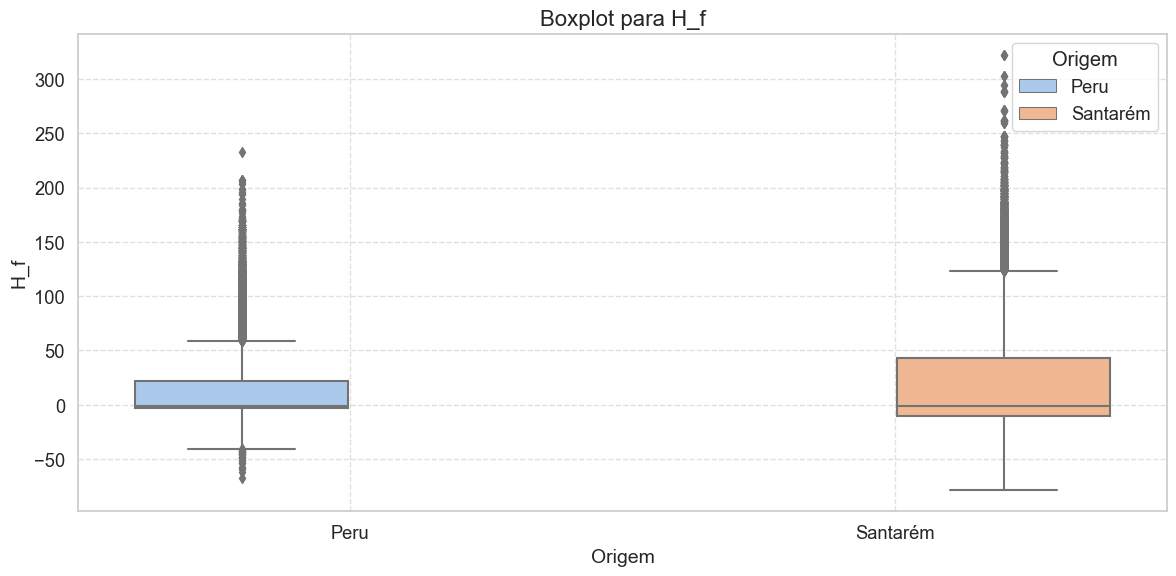

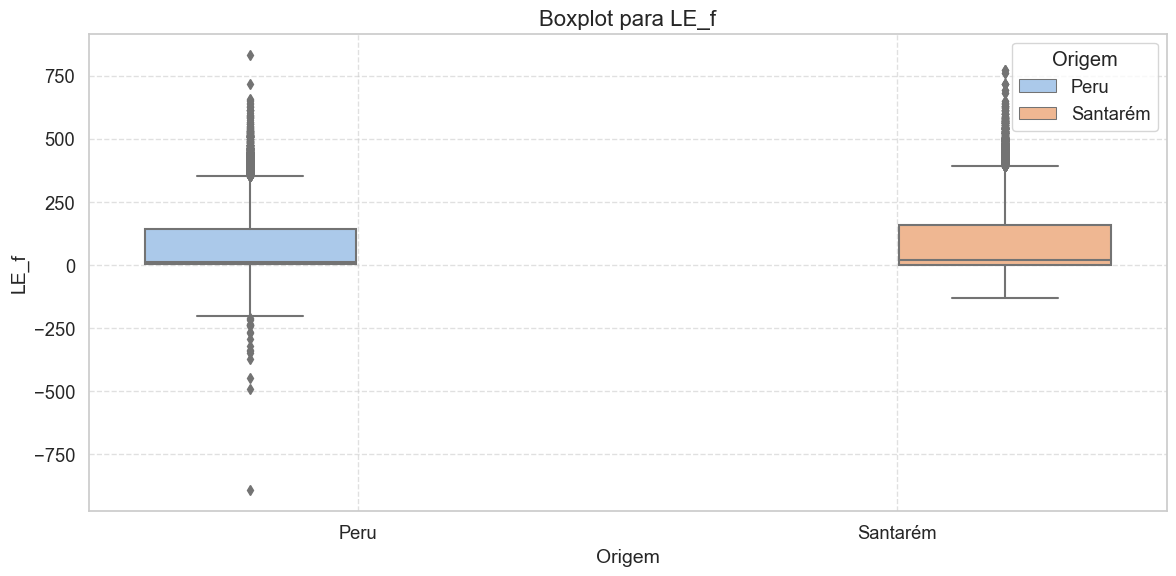

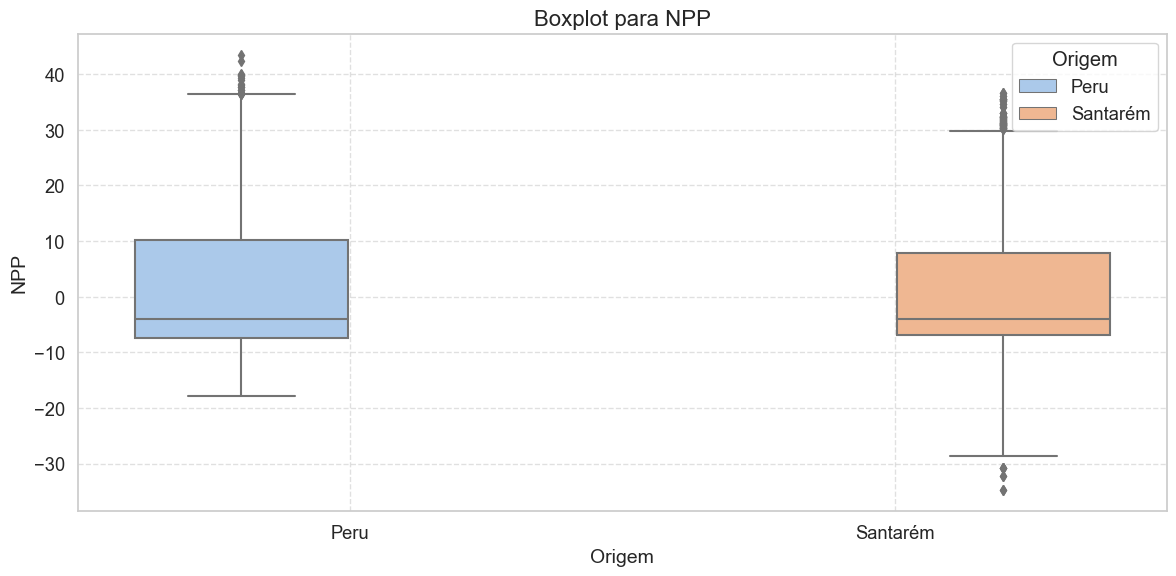

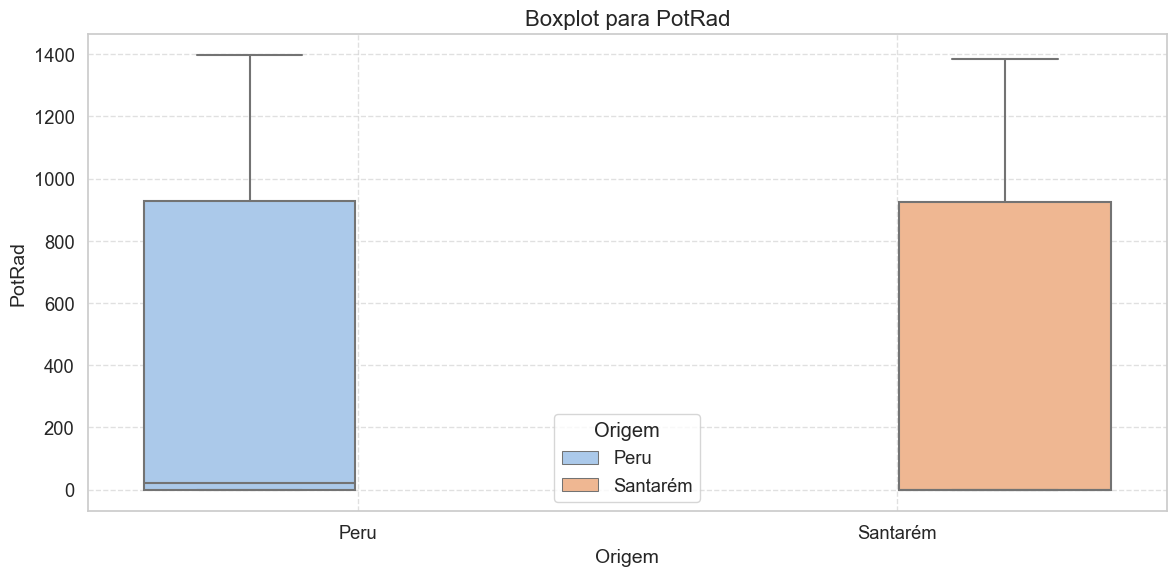

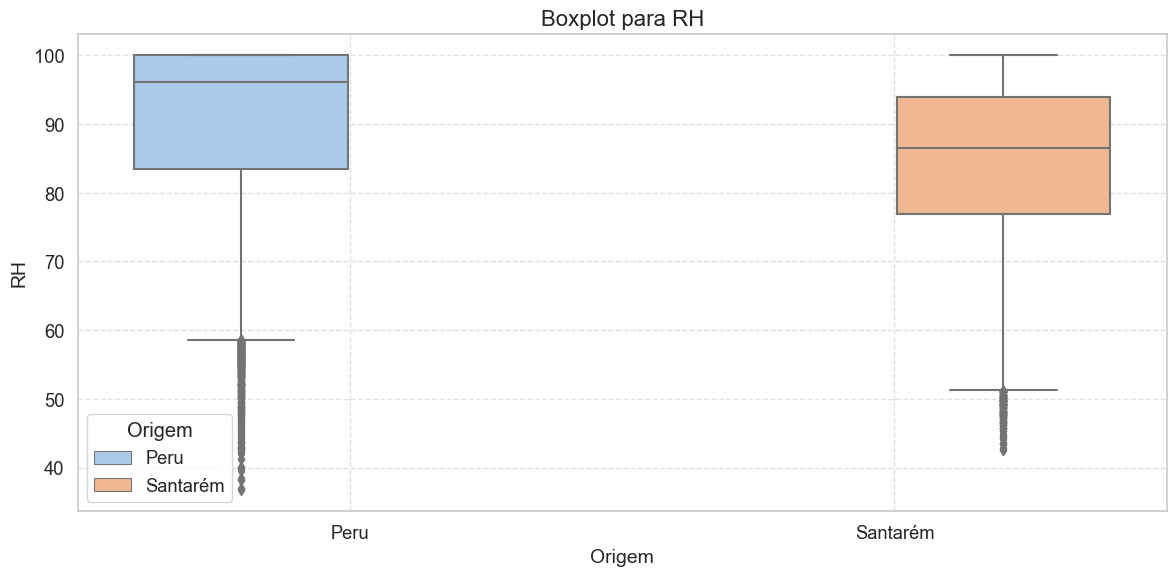

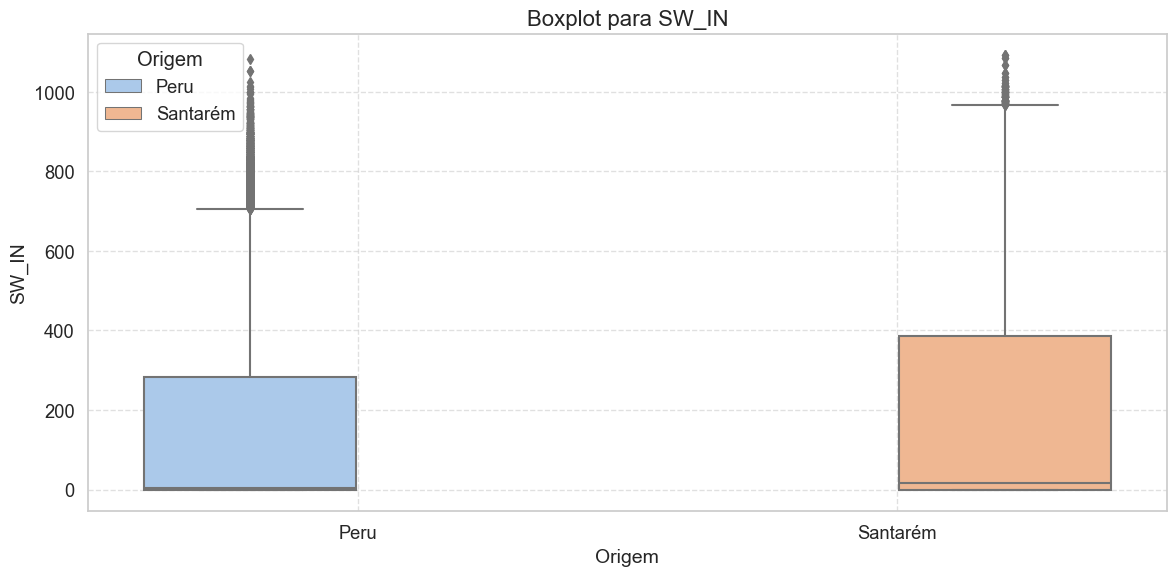

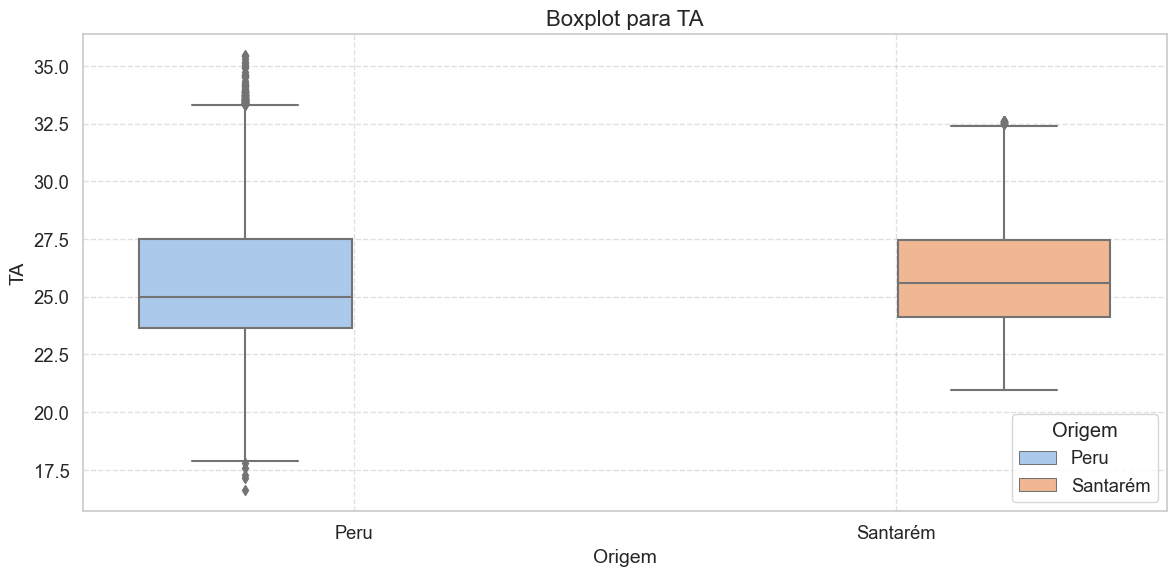

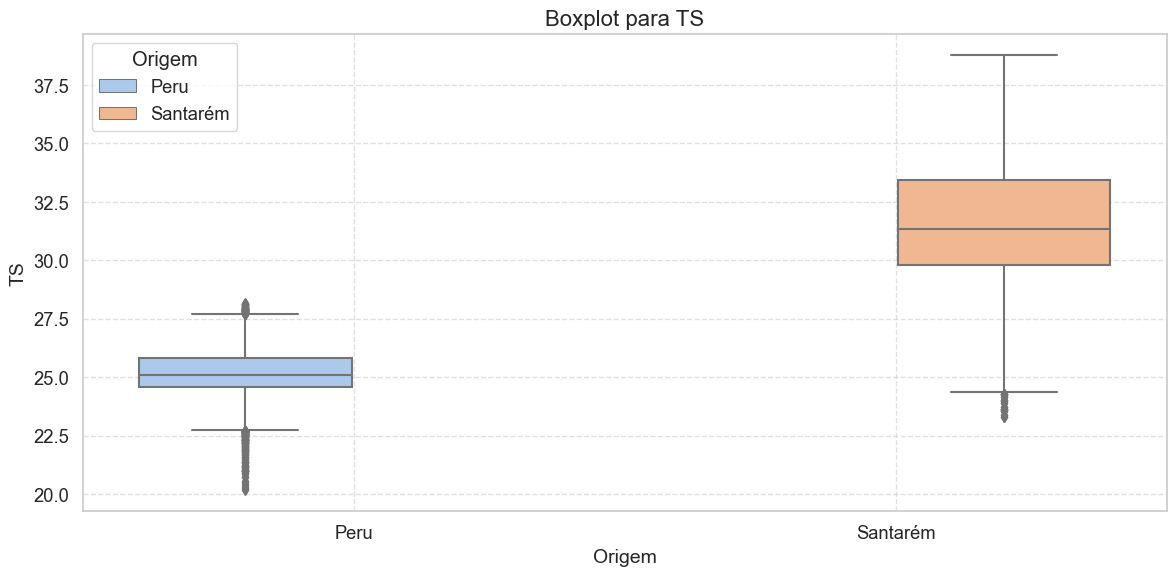

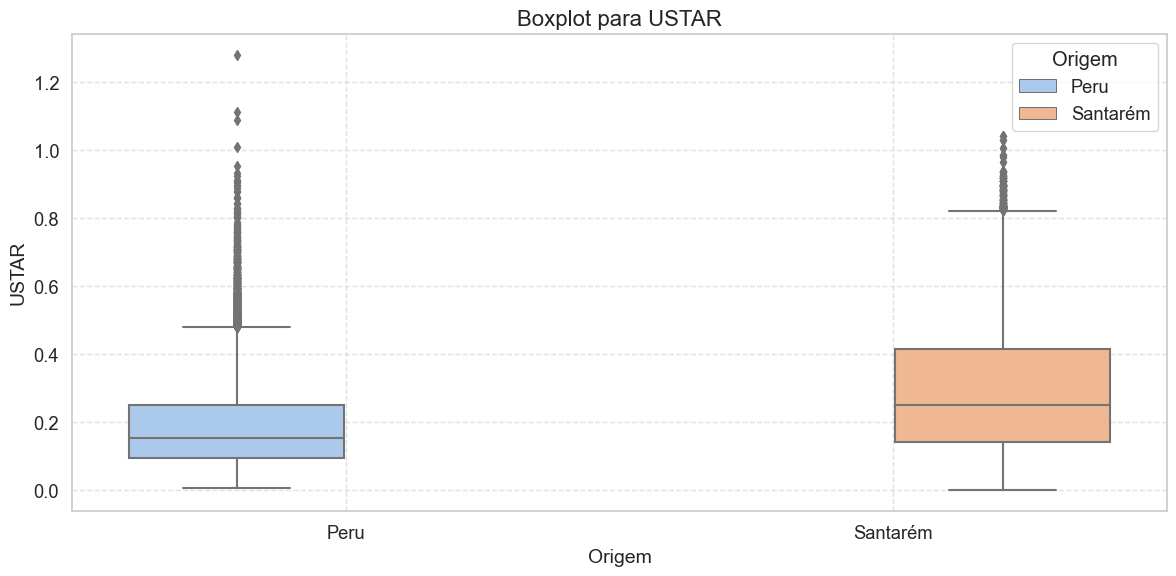

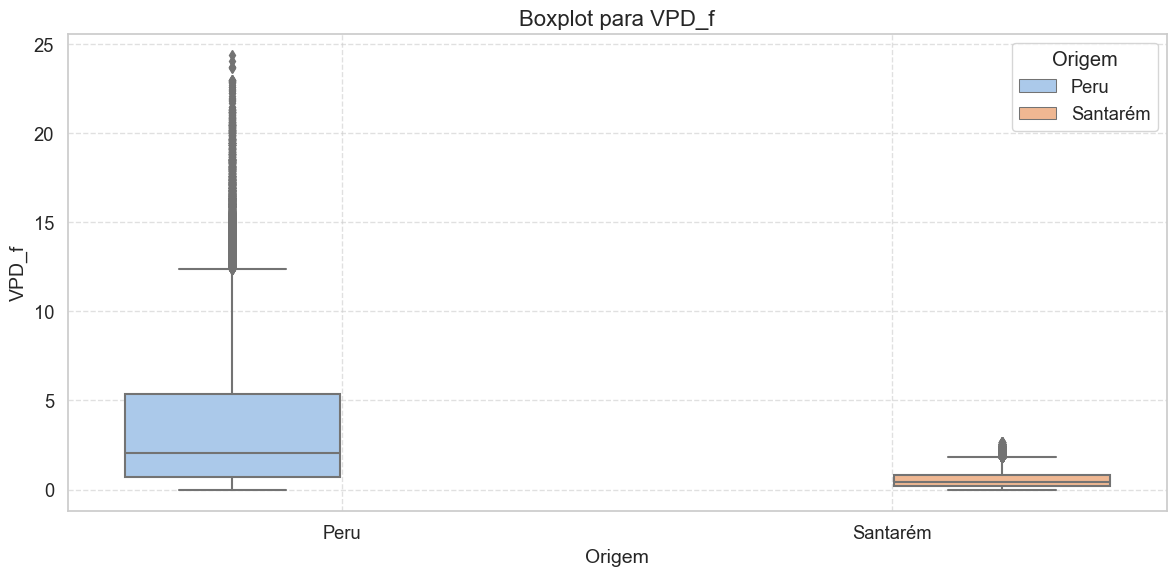

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Concatenando os dataframes com uma nova coluna indicando a origem dos dados
df_pe_filtered['Origem'] = 'Peru'
df_santarem_filtered['Origem'] = 'Santarém'
df_combined = pd.concat([df_pe_filtered, df_santarem_filtered], ignore_index=True)

sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(12, 6)})

# Lista de colunas (features) excluindo Date, DoY, Year e Month
colunas_a_plotar = df_combined.columns.difference(['Date', 'DoY', 'Year', 'Month', 'Origem'])

# Cria o boxplot vertical para cada feature
for coluna in colunas_a_plotar:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Origem', y=df_combined[coluna], data=df_combined, palette='pastel', hue='Origem')
    plt.title(f'Boxplot para {coluna}', fontsize=16)
    plt.ylabel(coluna, fontsize=14)
    plt.xlabel('Origem', fontsize=14)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Adiciona a legenda com a melhor posição
    plt.legend(title='Origem', loc='best')
    
    plt.show()